
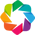

In [9]:
import pandas as pd
import numpy as np
import holoviews as hv
from scipy.stats import truncnorm
renderer=hv.renderer('bokeh')

hv.extension('bokeh')


# hv Dataset

In [10]:
#http://holoviews.org/user_guide/Plots_and_Renderers.html
""" curve = hv.Curve(range(10)); curve
scatter = hv.Scatter(station_info, 'services', 'ridership'); scatter
from IPython.display import display_html
html, info = renderer(curve, fmt='html')
print(info)
display_html(html, raw=True) """

" curve = hv.Curve(range(10)); curve\nscatter = hv.Scatter(station_info, 'services', 'ridership'); scatter\nfrom IPython.display import display_html\nhtml, info = renderer(curve, fmt='html')\nprint(info)\ndisplay_html(html, raw=True) "

In [11]:
diseases = pd.read_csv('/usr/local/lib/python2.7/dist-packages/holoviews/examples/assets/diseases.csv.gz')
diseases.head()


Year  Week    State  measles  pertussis
0  1928     1  Alabama     3.67        NaN
1  1928     2  Alabama     6.25        NaN
2  1928     3  Alabama     7.95        NaN
3  1928     4  Alabama    12.58        NaN
4  1928     5  Alabama     8.03        NaN

In [12]:
#http://holoviews.org/getting_started/Tabular_Datasets.html
vdims = [('measles', 'Measles Incidence'), ('pertussis', 'Pertussis Incidence')]
ds = hv.Dataset(diseases, ['Year', 'State'], vdims)
ds = ds.aggregate(function=np.mean)
ds

:Dataset   [Year,State]   (measles,pertussis)

In [15]:
%%opts Curve [width=600 height=250] {+framewise}
(ds.to(hv.Curve, 'Year', 'measles') + ds.to(hv.Curve, 'Year', 'pertussis')).cols(1)

:Layout
   .HoloMap.I  :HoloMap   [State]
      :Curve   [Year]   (measles)
   .HoloMap.II :HoloMap   [State]
      :Curve   [Year]   (pertussis)

In [21]:
""" 
http://holoviews.org/user_guide/Tabular_Datasets.html
https://stackoverflow.com/questions/47207715/drop-down-menu-for-column-visualization-in-holoviews
"""
df = pd.DataFrame({'dt': range(10), 'col1': np.random.rand(10),
                   'col2': np.random.rand(10), 'col3': np.random.rand(10)})
tidy_df = pd.melt(df, id_vars='dt', var_name='column', value_name='value')
ds = hv.Dataset(tidy_df)
#ds.to(hv.Curve, 'dt', 'value', 'column') # fails!!
tidy_df.head()


dt column     value
0   0   col1  0.074186
1   1   col1  0.815200
2   2   col1  0.018523
3   3   col1  0.192038
4   4   col1  0.072714

# df to holomap with slider

In [19]:
hv.HoloMap({col: hv.Curve(df, 'dt', col) for col in ['col1', 'col2', 'col3']},
           kdims='Column')

:HoloMap   [Column]
   :Curve   [dt]   (col3)

In [28]:
# HoloMap holds dictionaries 
# http://holoviews.org/reference/containers/bokeh/HoloMap.html#bokeh-gallery-holomap
#%%opts Curve {+framewise}  # to make it adjust the range when you select the dropdown value
frequencies = [0.5, 0.75, 1.0, 1.25]
phases      = [0, np.pi/2, np.pi, 3*np.pi/2]
def sine_curve(phase, freq):
    xvals = [0.1* i for i in range(100)]
    return hv.Curve((xvals, [np.sin(phase+freq*x) for x in xvals]))
curve_dict_2D = {(p,f):sine_curve(p,f) for p in phases for f in frequencies}
hmap = hv.HoloMap(curve_dict_2D, kdims=['phase', 'frequency'])
hmap

:HoloMap   [phase,frequency]
   :Curve   [x]   (y)

In [32]:
"""
http://holoviews.org/reference/elements/bokeh/Curve.html

df = pd.DataFrame({'dt': range(10), 'col1': np.random.rand(10),
                   'col2': np.random.rand(10), 'col3': np.random.rand(10)})
hv.HoloMap({(col): hv.Curve(df, 'dt', col) for col in ['col1', 'col2', 'col3']},
           kdims='Column')  """
import numpy as np
from scipy.stats import truncnorm


p1val = [1,2,3]
p2val = [0.1,0.2,0.3,0.4]
p3val = [10,20]
a,b=-1,1
xvals= np.linspace(a,b,10)
f=lambda x,a,b:truncnorm.pdf(x,a,b)
d={(p1,p2,p3):hv.Curve((xvals,f(xvals,min(p1,p2),max(p1,p2) ))) for p1 in p1val for p2 in p2val for p3 in p3val }

# A: facet pour le flowtype;  (p1,p2,p3): Curve( pdf(mu,sig))
# B: histo avec les mu, qd iter varie
hmap=hv.HoloMap(d,  kdims=['p1','p2','p3'])
hmap

:HoloMap   [p1,p2,p3]
   :Curve   [x]   (y)

# holomap + dummy overlay

In [5]:
p1val = [1,2,3]
p2val = [0.1,0.2,0.3,0.4]
p3val = [10,20]
itval = range(10)
iterables = [p1val,p2val,p3val,itval]
def overlay(p1,p2,p3,i):
        # this overlay doesn't use param values; just for test
    xvals = [0.1* i for i in range(100)]
    curve =  hv.Curve((xvals, [np.sin(x) for x in xvals]))
    scatter =  hv.Scatter((xvals[::5], np.linspace(0,1,20)))
    return curve * scatter
dic={(p1,p2,p3,i):overlay(p1,p2,p3,i)
        for p1 in p1val for p2 in p2val for p3 in p3val for i in itval }		
hmap = hv.HoloMap(dic, kdims=['p1val', 'p2val','p3val','it'])
hmap

:HoloMap   [p1val,p2val,p3val,it]
   :Overlay
      .Curve.I   :Curve   [x]   (y)
      .Scatter.I :Scatter   [x]   (y)

# holomap + group by label + overlay pdf

In [24]:
# create index and dataframe (supposing data was already generated)
idx=pd.MultiIndex.from_product(iterables, names=['p1','p2','p3','it'])
df1 = pd.DataFrame(index=idx)
nflow=10
label_long = [i for i in 'aaabbbcccd']; label_short=['a','b','c','d']
assert(len(label_long)==nflow)
df = pd.DataFrame({'mu': [np.random.rand(nflow) for i in range(len(idx))],
                   'sigma': [0.1*np.random.rand(nflow) for i in range(len(idx))]},
                   index=idx)
# group by label and overlay pdf
a,b=-1,1
xvals= np.linspace(a,b,20)    
def overlay_pdf(p1,p2,p3,i,l):
    # get (mu,sig) that correspond to p1,p2,p3,i
    mu,sig=df.loc[(p1,p2,p3,i)]
    # get indexes in label_long that correspond to l
    idx=np.where(np.array(label_long)==l)[0]    
    # compute pdf Curves	
    pdfs = { ii :   hv.Curve((xvals,truncnorm.pdf(xvals,a,b,loc=mu[ii],scale=sig[ii])))
    for ii in idx}    
    return hv.NdOverlay(pdfs, kdims='nagent')
dic={(p1,p2,p3,i,l):overlay_pdf(p1,p2,p3,i,l)
    for p1 in p1val for p2 in p2val for p3 in p3val for i in itval for l in label_short}
hmap = hv.HoloMap(dic, kdims=['p1val', 'p2val','p3val','it','label']) 
#renderer.save(hmap, 'hmap.html')
#renderer.save(hmap, './hmap', fmt='html')
s=renderer.static_html(hmap)
f= open('hmap.html', 'w'); f.write(s) ; f.close()
print 'done'
#hmap
#from bokeh.io import output_file, save, show
#output_file("hmap.html")
#show(hmap)

done


# eurostat data

In [ ]:
#http://www.jeannicholashould.com/tidy-data-in-python.html
fname_in='~/local/git/sfc_proba/data/naio_10_cp15.tsv.gz'
df = pd.read_csv(fname_in,compression='gzip',sep='\t')